In [135]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
%matplotlib inline

# Merging Months data 

In [121]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

In [122]:
# Checking for values 
# To convert Quantity, Price into int 
sales_data = pd.read_csv("all_data_copy.csv")
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [123]:
sales_data.head()   

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Cleaning Data

In [124]:
# Checking for NAN, very less, remove 40/120000
sales_data.isnull().value_counts()
sales_data = sales_data.dropna(how = 'all')

In [125]:
# Removing or as a part of cleaning 
sales_data = sales_data[sales_data['Order Date'].str[0:2]!='Or']

In [126]:
# Coverting str to numbers
sales_data["Price Each"] = pd.to_numeric(sales_data["Price Each"])
sales_data["Quantity Ordered"] = pd.to_numeric(sales_data["Quantity Ordered"])


# Augmenting Months

In [127]:
# Get Month for analysis 
sales_data["Month"] = sales_data["Order Date"].str[0:2]
sales_data["Month"]= sales_data["Month"].astype('int32')

In [128]:
# Get Area for analysis 
sales_data["Area"] = [x.split(',')[1] for x in sales_data['Purchase Address'].values]


In [108]:
# Clean Order data and get the time for analysing the most active periods
sales_data["Order Date"].head()
sales_data["Time"] = [x.split(' ')[1] for x in sales_data['Order Date'].values]

In [129]:
# Getting total cost for analysis 
sales_data["Total Sales"]=sales_data["Price Each"]*sales_data["Quantity Ordered"]

In [130]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Area,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99


In [131]:
# Exploratory data Analaysis
sales_data["Product"].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

# Buisness Questions 

 Q1. What is the best month for sales ?


In [140]:
sum_sales = sales_data.groupby(by="Month").sum()
sum_sales

,Quantity Ordered,Price Each,Total Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


Text(0, 0.5, 'Total Sales in US($)')

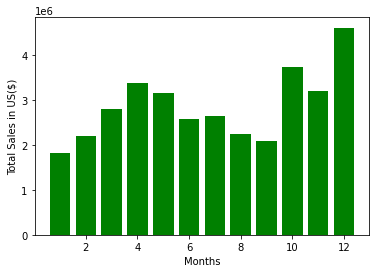

In [145]:
# December seems to have the highest sales 
# Figure out the items that are sold the most  

months = range(1,13)
plt.bar(months, sum_sales['Total Sales'], color="Green")
plt.xlabel("Months")
plt.ylabel("Total Sales in US($)") 

Q.2 What cities had the highest sales?

In [110]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09
